In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.74743526, -0.27432591,  0.32561897, -0.39509724, -0.29642348,
         0.10603492, -0.48445171,  0.62718309,  1.49919901, -0.3750996 ],
       [-0.64743465, -0.8223927 , -1.13210444,  1.4822788 ,  2.02558259,
        -0.09051431, -0.4739691 ,  0.15615744,  0.14646987,  0.202556  ]])

In [4]:
test_Features[:2]

array([[-0.72643617, -0.59579854, -1.1803496 ,  1.02442223,  0.77227845,
        -0.14599319, -0.59290137, -0.42245027,  1.55221221, -0.63664043],
       [-0.71388062, -0.54356796, -0.8089888 ,  0.37839044,  0.44198531,
         0.26413438, -0.56322026, -0.8002791 ,  0.38693325, -0.70941861]])

In [5]:
train_Label[:4]

array([0, 1, 1, 1])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=10*4,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=10*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=10*2,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=10,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(10, activation='tanh'))

In [20]:
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 40)            80        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 40)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 30)            1230      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 30)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 20)            620       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 20)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 10)            210       
__________

In [22]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 6s 621us/step - loss: 0.6720 - acc: 0.6326 - val_loss: 0.6263 - val_acc: 0.7485
Epoch 2/30
10194/10194 [==============================] - 1s 66us/step - loss: 0.5794 - acc: 0.7328 - val_loss: 0.5079 - val_acc: 0.7768
Epoch 3/30
10194/10194 [==============================] - 1s 117us/step - loss: 0.4790 - acc: 0.7793 - val_loss: 0.4306 - val_acc: 0.8089
Epoch 4/30
10194/10194 [==============================] - 1s 114us/step - loss: 0.4222 - acc: 0.8095 - val_loss: 0.3975 - val_acc: 0.8325
Epoch 5/30
10194/10194 [==============================] - 1s 88us/step - loss: 0.3897 - acc: 0.8334 - val_loss: 0.3723 - val_acc: 0.8443
Epoch 6/30
10194/10194 [==============================] - 1s 82us/step - loss: 0.3681 - acc: 0.8487 - val_loss: 0.3562 - val_acc: 0.8478
Epoch 7/30
10194/10194 [==============================] - 1s 96us/step - loss: 0.3559 - acc: 0.8526 - val_loss: 0.3498 - val_a

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

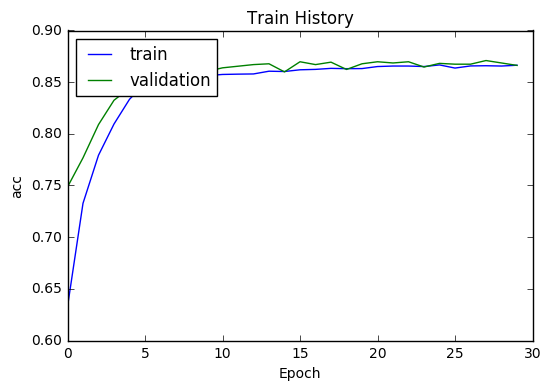

In [25]:
show_train_history(train_history,'acc','val_acc')

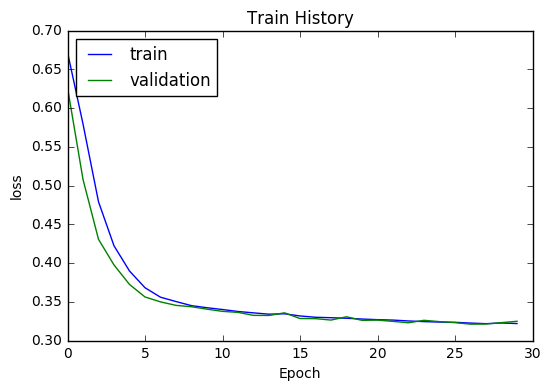

In [26]:
show_train_history(train_history,'loss','val_loss')

In [27]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 123us/step


In [28]:
scores[1]

0.8578938983780802